# EDA
## 라이브러리 불러오기


In [1]:
import pandas as pd

## 파이썬 파일 불러오기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 행열 갯수 관찰하기

In [3]:
train.shape

(1459, 11)

In [4]:
test.shape

(715, 10)

## 처음 N줄 관찰하기

In [5]:
train.head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039,93.0,19.0,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025,64.0,19.0,83.0


## 결측치 확인하기

In [6]:
print(train.isnull())
print('\n-------------------train.csv null for each column---------------\n')
print(test.isnull().sum())

         id   hour  hour_bef_temperature  hour_bef_precipitation  \
0     False  False                 False                   False   
1     False  False                 False                   False   
2     False  False                 False                   False   
3     False  False                 False                   False   
4     False  False                 False                   False   
...     ...    ...                   ...                     ...   
1454  False  False                 False                   False   
1455  False  False                 False                   False   
1456  False  False                 False                   False   
1457  False  False                 False                   False   
1458  False  False                 False                   False   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
0                  False              False                False   
1                  False              False    

# 전처리
## 데이터 기본 정보 확인하기

In [7]:
print(train.info())
print('\n---------------------------------------------\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
None

---------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 colu

## 결측치 삭제, 대체하기

In [8]:
train = train.dropna()
test = test.fillna(0)

# 모델링_의사결정회귀나무로 따릉이 데이터 예측하기
## scikit-learn

In [9]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

## 의사결정나무
데이터에서 각 행은 피쳐를 가지고 있음. 이 중 하나의 피쳐를 통해서 해당 피쳐의 값에 대해 특정 하나의 값을 정한다면, 이를 기준으로 모든 행은 두 개의 노드(Node)로 분류(Binary decision rule, 이진분할) 할 수 있음. 이 과정을 반복하면 피쳐의 값에 따라 데이터가 분류됨. 이 때 특정한 값을 정하는 의사결정 나무의 대원칙은 한쪽 방향으로 쏠리도록! 이를 불순도를 통해 계산해서 찾아나감.

In [10]:
model = DecisionTreeClassifier()

## 의사결정나무 훈련
모델을 선언한 후, fit(X,Y)를 통해 모델 훈련. 여기서 주의해야 할 점은 X 데이터는 예측에 사용되는 변수고, Y는 예측결과 변수여야 함. \n
X는 트레인에서 예측할 피쳐 제외 \n
Y는 예측할 컬럼으로 인덱싱 \n

In [11]:
'''train 데이터중 예측해야할 count 피쳐를 drop()함수를 사용하고, 
axis=1 옵션을 사용해 해당 열을 제외한 데이터들을 X_train 이라는 이름의 DataFrame 객체로 만들고 
count 피쳐만을 데이터로 갖는 Y_train 이라는 이름의 DataFrame 객체로 만드는 코드를 아래에 작성하세요'''
X_train = train.drop(['count'], axis=1)
Y_train = train['count']

In [12]:
'''model 변수명으로 모델을 선언하고, fit() 함수를 사용해서, 
X_train 을 input 으로 삼고, 
Y_train 을 output 으로 삼아 모델을 훈련시키는 코드를 아래에 작성하세요'''
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

## 테스트 예측
훈련된 모델에서 predict() 매서드에 예측하고자 하는 data 를 인자로 넣어주게 되면 해당 결과 array 를 할당할 수 있습니다.

In [13]:
'''predict() 를 이용해 test data 를 훈련된 모델로 예측한 data 를 생성하고 
예측결과 상위 5개를 출력하는 코드를 작성하세요.'''


pred = model.predict(test)
pred[:5]

array([106., 164., 104.,  49.,  93.])

## 제출파일생성

In [14]:
submission = pd.read_csv('submission.csv')
submission['count'] = pred
submission.to_csv('sub.csv', index=False)

# 전처리_결측치 보간법
앞선 예제에서는 결측치를 0으로 대체했지만, 보다 나은 모델 성능을 위해서 결측치를 평균값을 대체

## 결측치 평균으로 대체

In [15]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [16]:
print(train.isnull().sum())
print(test.isnull().sum())

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64
id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64


In [17]:
train.fillna({'hour_bef_temperature':int(train['hour_bef_temperature'].mean())}, inplace=True)
train.fillna({'hour_bef_precipitation':int(train['hour_bef_precipitation'].mean())}, inplace=True)
train.fillna({'hour_bef_windspeed':int(train['hour_bef_windspeed'].mean())}, inplace=True)
train.fillna({'hour_bef_humidity':int(train['hour_bef_humidity'].mean())}, inplace=True)
train.fillna({'hour_bef_visibility':int(train['hour_bef_visibility'].mean())}, inplace=True)
train.fillna({'hour_bef_ozone':int(train['hour_bef_ozone'].mean())}, inplace=True)
train.fillna({'hour_bef_pm10':int(train['hour_bef_pm10'].mean())}, inplace=True)
train.fillna({'hour_bef_pm2.5':int(train['hour_bef_pm2.5'].mean())}, inplace=True)

In [18]:
print(train.isnull().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64


## 결측치 보간법으로 대체
피쳐의 정보성을 강조하기 위해 보간법을 사용해 결측치 채워보기. 이번 피쳐는 기상정보, 데이터 순서는 시간 순서. 따라서 결측치를 이전 행과 다음 행의 평균으로 보간하는 것이 합리적인 것으로 보임.

In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.interpolate(inplace=True)

# 모델링_랜덤포레스트
랜덤포레스트는 여러 개의 의사결정나무를 만들어서 이들의 평균으로 예측 성능 높이는 방법. 이러한 기법은 앙상블 기법이라 함. 주어진 하나의 데이터로부터 여러 개의 랜덤 데이터셋을 추출해, 각 데이터셋을 통해 모델을 여러 개 만들 수 있음.

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

## 랜덤포레스트를 평가척도에 맞게 학습
랜덤포레스트 모듈 중 옵션인 criterion 옵션을 통해 어떤 평가척도를 기준으로 훈련할 것인지 정할 수 있음. 따릉이 대회 평가지표는 RMSE로, 이는 MSE에 루트를 씌운 값, 모델 선언할 때 criterion='mse'옵션으로 구현 가능

In [21]:
X_train = train.drop(['count'], axis=1)
Y_train = train['count']

In [22]:
model = RandomForestRegressor(criterion = 'mse')
model.fit(X_train, Y_train)

/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse')

# 튜닝

## 랜덤포레스트 변수중요도 확인

fit()으로 모델이 학습되고 나면 feature_importances 속성으로 변수의 중요도를 파악할 수 있음. 변수의 중요도란 예측변수를 결정할 때 피쳐가 얼마나 중요한 역할을 하는지에 대한 척도로, 변수 중요다가 낮다면 해당 피쳐를 제거하는 것이 모델의 성능을 높일 수 있음. 


In [23]:
model.feature_importances_

array([0.0270918 , 0.59605745, 0.18114846, 0.01834141, 0.0259341 ,
       0.03588705, 0.03221615, 0.03353154, 0.03030909, 0.01948295])

## 변수 제거
변수중요도가 낮은 피쳐를 파악하고 나면 차례대로 하나의 피쳐를 제거하면 모델 새롭게 훈련 가능. 각 모델로 예측해 성능 비교. id,hour_bef_windspeed, hour_bef_pm2.5 는 예측에 의미가 없는 피쳐. 3쌍의 트레인 셋과 테스트셋 만들기. 이에 따라 각 모델로 예측한 값을 저장

In [41]:
# X_train 에서 drop 할 피쳐의 경우에 수 대로 3개의 X_train 을 생성하세요.

X_train_1 = train.drop(['count','id'], axis=1)
X_train_2 = train.drop(['count', 'id', 'hour_bef_windspeed'], axis=1)
X_train_3 = train.drop(['count', 'id', 'hour_bef_windspeed', 'hour_bef_pm2.5'], axis=1)

# 각 train 에 따라 동일하게 피쳐를 drop 한 test 셋들을 생성하세요.

test_1 = test.drop(['id'], axis=1)
test_2 = test.drop(['id', 'hour_bef_windspeed'], axis=1)
test_3 = test.drop(['id', 'hour_bef_windspeed', 'hour_bef_pm2.5'], axis=1)

In [49]:
test_1.interpolate(inplace=True)
test_2.interpolate(inplace=True)
test_3.interpolate(inplace=True)
test.interpolate(inplace=True)

In [42]:
# 각 X_train에 대해 모델 훈련을 해주세요.

model_input_var1 = RandomForestRegressor(criterion = 'mse')
model_input_var1.fit(X_train_1, Y_train)

model_input_var2 = RandomForestRegressor(criterion = 'mse')
model_input_var2.fit(X_train_2, Y_train)

model_input_var3 = RandomForestRegressor(criterion = 'mse')
model_input_var3.fit(X_train_3, Y_train)

/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse')

In [37]:
# 각 모델로 test 셋들을 예측해주세요.

y_pred_1 = model_input_var1.predict(test_1)
y_pred_2 = model_input_var2.predict(test_2)
y_pred_3 = model_input_var3.predict(test_3)

In [44]:
# 각 결과들을 submission 파일로 저장해주세요.

submission_1 = pd.read_csv('submission.csv')
submission_2 = pd.read_csv('submission.csv')
submission_3 = pd.read_csv('submission.csv')

submission_1['count'] = y_pred_1
submission_2['count'] = y_pred_2
submission_3['count'] = y_pred_3

submission_1.to_csv('sub_1.csv',index=False)
submission_2.to_csv('sub_2.csv',index=False)
submission_3.to_csv('sub_3.csv',index=False)

## 하이퍼파라미터, GridSearch
1. 최대깊이는 최대로 내려갈 수 있는 depth 입니다. 뿌리 노드로부터 내려갈 수 있는 깊이를 지정하며 작을수록 트리는 작아지게 됩니다.

2. 최소 노드크기는 노드를 분할하기 위한 데이터 수 입니다. 해당 노드에 이 값보다 적은 확률변수 수가 있다면 stop. 작을수록 트리는 커지게 됩니다.

3. 최소 향상도는 노드를 분할하기 위한 최소 향상도 입니다. 향상도가 설정값 이하라면 더 이상 분할하지 않습니다. 작을수록 트리는 커집니다.

4. 비용 복잡도는 트리가 커지는 것에 대해 패널티 계수를 설정해서 불순도와 트리가 커지는 것에 대해 복잡도를 계산하는 것입니다.

이 4가지 정지규칙을 종합적으로 고려해 최적의 조건값을 설정할 수 있으며, 이를 하이퍼파라미터 튜닝이라고 함.
하이퍼파라미터 튜닝에는 여러 방법론이 있는데, 그 중 최고 성능을 나타내는 GridSearch는 완전탐색을 사용함. 가능한 모든 조합 중에서 가장 우수한 조합을 찾는데, 완전탐색이기 때문에 시간이 매우 오래 걸린다는 단점이 있음.

## GridSearch

In [45]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(criterion = 'mse', random_state=2020)

params = {'n_estimators': [200, 300, 500],
          'max_features': [5, 6, 8],
          'min_samples_leaf': [1, 3, 5]}

greedy_CV = GridSearchCV(model, param_grid=params, cv = 3, n_jobs = -1)
greedy_CV.fit(X_train, Y_train)

/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(criterion='mse',
                                             random_state=2020),
             n_jobs=-1,
             param_grid={'max_features': [5, 6, 8],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [200, 300, 500]})

In [50]:
pred = greedy_CV.predict(test)
pred

array([ 98.2096086 , 219.56942193,  79.55960615,  42.45692629,
        58.30486392, 128.80483538, 192.5235082 , 293.74524871,
        41.61470815, 110.82005016, 299.65255831, 251.45269998,
       108.02500782,  43.80077573, 201.53157912, 161.17019805,
        25.26753403, 178.62625389, 327.58199014, 162.13943663,
       232.61158011,  81.12243977,  30.00139691, 140.52185454,
       139.41846753, 114.47330363,  26.48873329, 120.80212807,
       114.07323016, 159.43079647,  82.01214334,  40.45128678,
        66.29257155, 129.96711484, 277.92944208,  40.14311712,
       134.36958668, 117.57202501, 225.60856668,  85.28241007,
        59.38148031, 122.77523341, 169.98789946,  80.12606825,
       321.01760867, 188.70778622,  88.67695961,  63.10269096,
        21.55733771,  89.84926431, 248.55496642,  94.11972066,
       143.42935269,  81.08390931, 201.26205712, 150.92577552,
        50.57824471, 184.3272286 ,  29.43277822,  19.47562297,
        96.77822777,  85.50351067, 255.50734634, 294.43

In [51]:
submission = pd.read_csv('submission.csv')

In [52]:
import numpy as np

submission['count'] = np.round(pred, 2)

In [53]:
submission.head()

,id,count
0,0,98.21
1,1,219.57
2,2,79.56
3,4,42.46
4,5,58.30


In [54]:
submission.to_csv('sub2.csv',index=False)

/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/daeun/opt/anaconda3/lib/python3.8/sit

/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/daeun/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/daeun/opt/anaconda3/lib/python3.8/sit

# Review

In [55]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [56]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [57]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [58]:

print('train 행열 갯수:', train.shape)
print('test 행열 갯수:', train.shape)

train 행열 갯수: (1459, 11)
test 행열 갯수: (1459, 11)


In [59]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [60]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [63]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [64]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='count', ylabel='Count'>

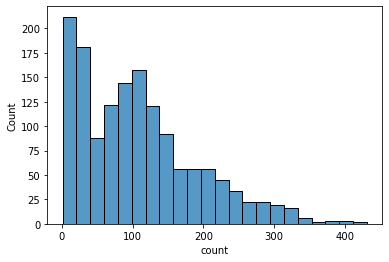

In [65]:
sns.histplot(train['count'])

In [66]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


<AxesSubplot:>

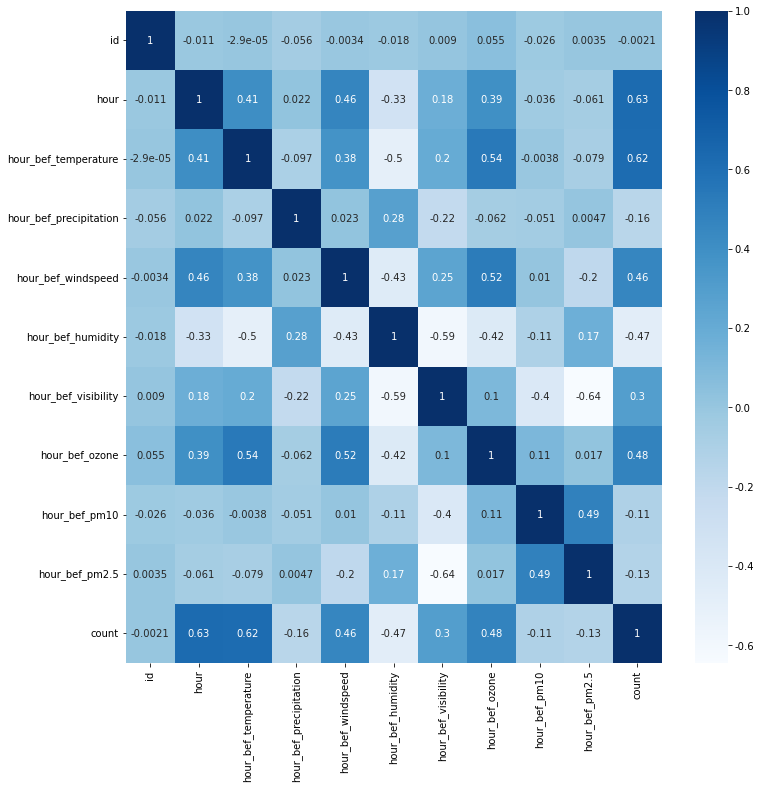

In [69]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True,cmap='Blues')


<AxesSubplot:xlabel='hour', ylabel='count'>

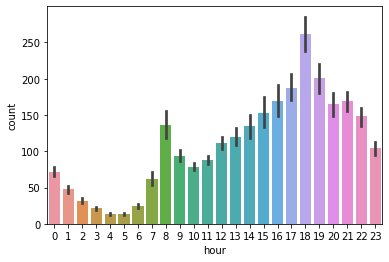

In [68]:
sns.barplot(x='hour', y='count', data=train)

In [70]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

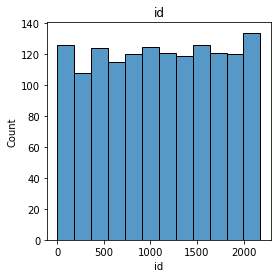

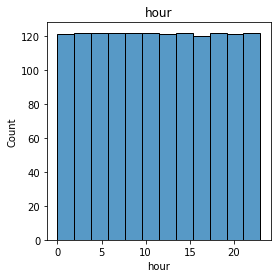

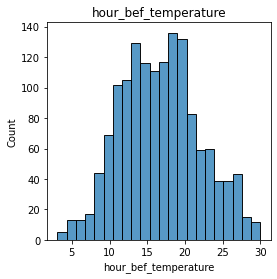

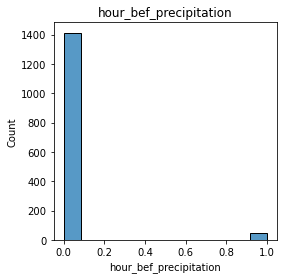

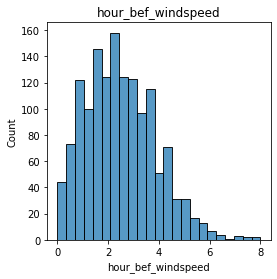

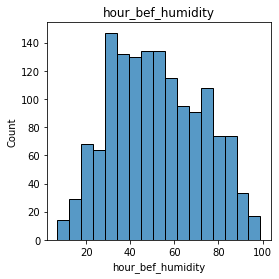

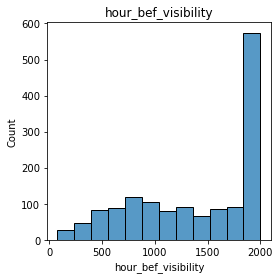

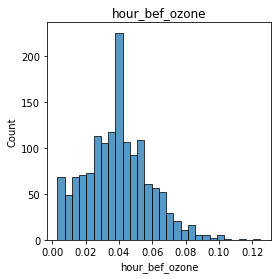

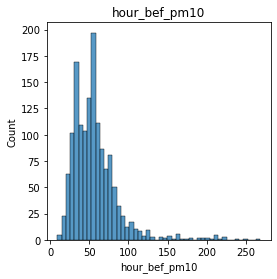

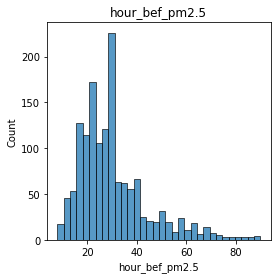

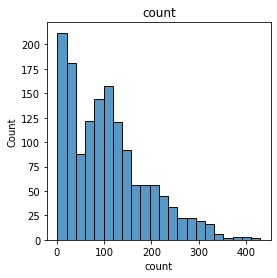

In [71]:
for col in train.columns:
    plt.figure(figsize=(4,4))
    plt.title(col)
    sns.histplot(train[col])
    plt.show()
    

<AxesSubplot:xlabel='hour_bef_pm2.5', ylabel='Count'>

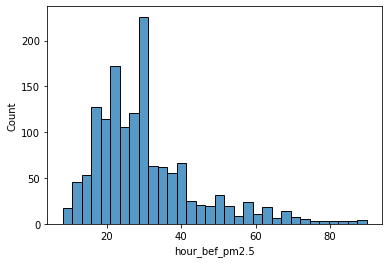

In [72]:

test['hour_bef_pm2.5'] = np.log1p(test['hour_bef_pm2.5'])
test['hour_bef_pm10'] = np.log1p(test['hour_bef_pm10'])

sns.histplot(train['hour_bef_pm2.5'])



In [73]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [74]:
X_train = train.drop(['id', 'count'], axis = 1)
y_train = train['count']
X_test = test.drop('id', axis = 1)

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
RandomForestRegressor()

RandomForestRegressor()

In [77]:
param = {'min_samples_split': [30, 50, 70],
        'max_depth': [5, 6, 7],
        'n_estimators': [50, 150, 250]}

In [78]:
gs = GridSearchCV(estimator=model, param_grid=param, scoring = 'neg_mean_squared_error', cv = 3)

In [79]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [80]:
submission = pd.read_csv('submission.csv')
pred = gs.predict(X_test)
submission['count']=pred
submission.to_csv('gridsearch.csv', index=False)